Python Base. Pandas. Домашнее задание (HW) №3

# 0. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('D:/Учеба/Магистратура/Python/ДЗ №3/riiid-test-answer-prediction/train.csv')

In [3]:
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


Так как строчек в таблице **TRAIN.CSV** более 100 млн., то для быстродействия сократим её до 1 млн. строк.

In [4]:
train = train.head(1000000)
train.shape[0]

1000000

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [6]:
questions =  pd.read_csv('D:/Учеба/Магистратура/Python/ДЗ №3/riiid-test-answer-prediction/questions.csv')

In [7]:
questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [9]:
lectures =  pd.read_csv('D:/Учеба/Магистратура/Python/ДЗ №3/riiid-test-answer-prediction/lectures.csv')

In [10]:
lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [11]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


# 1. Описание данных

Данные были взяты из Kaggle соревнования и представляют собой вопросы и лекции в рамках Test of English for International Communication(TOEIC).
Тест английского языка для международного общения - это международный стандартизированный тест на знание английского языка для лиц, не являющихся носителями языка. Он специально разработан для измерения повседневных навыков владения английским языком людей, работающих в международной среде. Существуют различные формы экзамена TOEIC, в нашем случае это TOEIC Listening Reading, который состоит из двух одинаково градуированных тестов оценки понимания деятельности на общую сумму возможных 990 баллов. В датасете 100 миллионов взаимодействий студента с вопросами или лекциями. 
Данные взаимодействия описаны тремя таблицами:

+ **`TRAIN.CSV`**


+ **`QUESTIONS.CSV`**


+ **`LECTURES.CSV`**

Пройдемся подробнее по каждой таблице.

## 1.1. Таблица **`TRAIN.CSV`**

Это основная таблица, которая связывает студента с вопросом или лекцией, с которыми он взаимодействует, а также дополнительная информация об этом взаимодействии. 

Список колонок и краткое их описание:

+ **row_id**: порядковый номер строки в этой таблице.

+ **timestamp**: время в миллисекундах между текущим взаимодействием и первым событием связанным с данным ученика.

+ **user_id**: идентификационный код ученика.

+ **content_id**: идентификационный код вопроса или лекции.

+ **content_type_id**: 0 если это вопрос, 1 если лекция.

+ **task_container_id**: идентификационный код группы вопросов, в которой задан текущий вопрос.

+ **user_answer**: вариант ответа, который выбрал ученик. Всего вариантов может быть 4. В случае если взаимодействие - это лекция, а не вопрос, то данное поле равно -1.

+ **answered_correctly**: правильно ли ученик ответил на вопрос. В случае, если взаимодействие - это лекция, а не вопрос, то данное поле равно -1. Данное поле является целевым значением.

+ **prior_question_elapsed_time**: среднее время в миллисекундах, которое ученику потребовалось, чтобы ответить на все вопросы в предыдущей группе, игнорируя любые лекции между ними. Равен 0 для первой группы вопросов, заданной ученику.

+ **prior_question_had_explanation**: смотрел ли ученик объяснение и правильный ответ на предыдущий вопрос.


## 1.2. Таблица **`QUESTIONS.CSV`**

Таблица описывающая вопрос. Количество вопросов в отличии от количества учеников заранее зафиксировано, также задания повторно предлагаются различным ученикам. 

Список колонок:

+ **question_id**: внешний ключ(foreign key) для связывание данной информации с таблицей train.

+ **bundle_id**: код по которому вопросы объединяются в группы.

+ **correct_answer**: правильный ответ на вопрос.

+ **part**: один из семи типов вопросов TOEIC.

+ **tags**: один или несколько кодов с тэгами для данного вопроса.

## 1.3. Таблица **`LECTURES.CSV`**

Данная таблица аналогична таблице про вопросы, но она про лекции, перейдем к ее описанию:

+ **lecture_id**: внешний ключ(foreign key) для связывание данной информации с таблицей train.

+ **type_of**: краткое описание основной цели лекции.

+ **part**: один из семи типов, который был в таблице с вопросами.

+ **tag**: один тэг в качестве числа, который представляет лекцию, его значение не дано, также как и в вопросах.



# 2. Обработка данных

## 2.1. Изменение типа данных

В таблице **TRAIN.CSV** можно изменить тип данных в столбце **prior_question_had_explanation** c Object на bool. 

Кроме того, в столбцах **timestamp** и **prior_question_elapsed_time** значения в миллисекундах можно поменять на секунды для удобства.

Также поместим значения в столбце **tags** в список

In [12]:
# Поменяем тип данных в столбце prior_question_had_explanation
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('bool')

C:\Users\М\AppData\Local\Temp\ipykernel_3212\545468381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('bool')


In [13]:
# Меняем значения в столбцах timestamp и prior_question_elapsed_time (на секунды)
train['timestamp'] = train['timestamp']/1000
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time']/1000


C:\Users\М\AppData\Local\Temp\ipykernel_3212\4089970713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['timestamp'] = train['timestamp']/1000
C:\Users\М\AppData\Local\Temp\ipykernel_3212\4089970713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prior_question_elapsed_time'] = train['prior_question_elapsed_time']/1000


Преобразуем значения в столбцу tags таблицы questions в список. Но для начала заменим пропущенное значение в столбце на -1

In [14]:
# Заменим пропуски в столбце tags
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [15]:
questions.loc[10033, 'tags'] = '-1'

In [16]:
tags_list = [x.split() for x in questions.tags.values]
questions['tags'] = tags_list
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


## 2.2. Объединение таблиц

Добавим в таблицу **question** данные о количестве и процентном соотношении правильных ответов

In [17]:
correct = train[train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['wrong', 'right']
correct = correct.fillna(0)
correct[['wrong', 'right']] = correct[['wrong', 'right']].astype(int)
questions = questions.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions['question_count'] = questions['wrong']+questions['right']
questions['percent_correct'] = questions['right']/questions['question_count']
questions.head()

,question_id,bundle_id,correct_answer,part,tags,wrong,right,question_count,percent_correct
0,0,0,0,1,"[51, 131, 162, 38]",10.0,63.0,73.0,0.863014
1,1,1,1,1,"[131, 36, 81]",4.0,51.0,55.0,0.927273
2,2,2,0,1,"[131, 101, 162, 92]",195.0,249.0,444.0,0.560811
3,3,3,0,1,"[131, 149, 162, 29]",40.0,159.0,199.0,0.798995
4,4,4,3,1,"[131, 5, 162, 38]",122.0,185.0,307.0,0.602606


Временно разделим train на две таблицы, где будут значения только с вопросами и только с лекциями

# 3. Анализ данных

## 3.1. Таблица train

Проведем анализ таблицы **train** в обозначенном объеме

**Количество учеников**

In [18]:
len(train['user_id'].unique())

3824

Из представленных данных в 1 млн. строк данные по **3824** студентам

**Процентное соотношение вопросов и лекций**

In [19]:
len(train[train['content_type_id']==1])/len(train['content_type_id'])

0.019907

Доля лекций меньше 2%

**Соотношение количества правильных ответов**

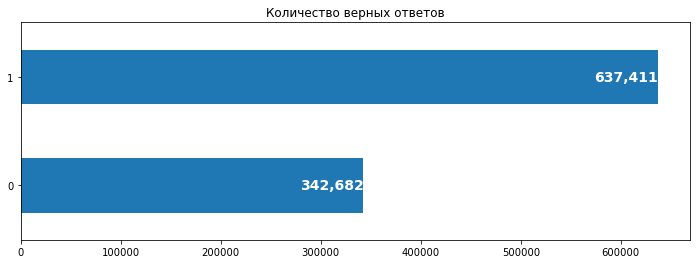

In [20]:
# Зададим переменную, где будут только ответы на вопросы (лекции исключаем)
correct = train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
# Построим график
fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Количество верных ответов")
plt.xticks(rotation=0)
plt.show()

Определим средний балл студентов

In [21]:
train[train['answered_correctly'] != -1]['answered_correctly'].mean()

0.6503576701394663

В **65%** случаях студенты отвечают правильно

**Среднее время на ответ**

In [22]:
# Посчитаем среднее время на ответ
train['prior_question_elapsed_time'].mean()

25.3029626929877

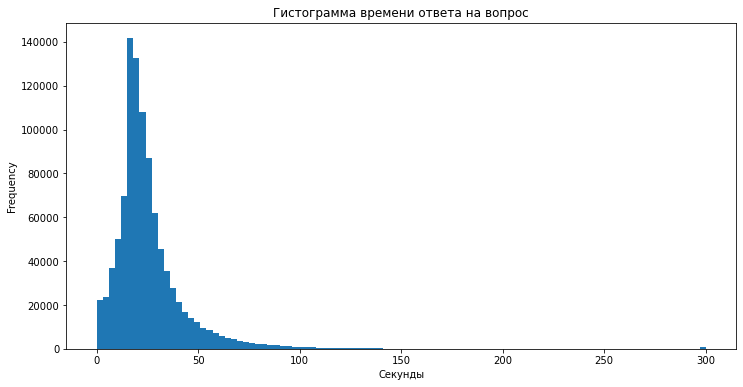

In [23]:
fig = plt.figure(figsize=(12,6))
train['prior_question_elapsed_time'].plot.hist(bins=100)
plt.title("Гистограмма времени ответа на вопрос")
plt.xticks(rotation=0)
plt.xlabel("Секунды")
plt.show()

В среднем на вопрос уходит около **25 секунд**. На гистограмме виден выброс значений в ~300 секунд.

**Посмотрим, есть ли разница в % правильных ответов в зависиомсти от времени с начала сессии**

In [24]:
pd.DataFrame({'timestamp': train[train['answered_correctly'] != -1]['timestamp'].groupby(train['answered_correctly']).mean()})

,timestamp
answered_correctly,
0,6.832591e+06
1,7.602158e+06


Чем ближе к началу сессии вопрос, тем менее успешно его проходят студенты 

**Посмотрим, есть ли разница в % правильных ответов в зависиомсти от среднего времеми ответа студента на вопросы**

In [25]:
pd.DataFrame({'prior_questions_time': train[train['answered_correctly'] != -1]['prior_question_elapsed_time'].groupby(train['answered_correctly']).mean()})

,prior_questions_time
answered_correctly,
0,25.215579
1,25.349966


Время ответа не влияет на правильность ответа

**Посмотрим, есть ли разница в % правильных ответов в зависиомсти от видел ли студент правильный ответ на предыдущее задание**

In [26]:
pd.DataFrame({'had_explanation': train[train['answered_correctly'] != -1]['prior_question_had_explanation'].groupby(train['answered_correctly']).count()})

,had_explanation
answered_correctly,
0,342682
1,637411


Если студент видел объяснение предыдущий задачи, вероятность правильного ответа удваивается

## 3.2. Таблица questions

Проведем анализ таблицы **questions**

In [27]:
questions.shape[0]

13523

Всего в базе **13523 вопроса**

**Распределение вопросов по темам**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

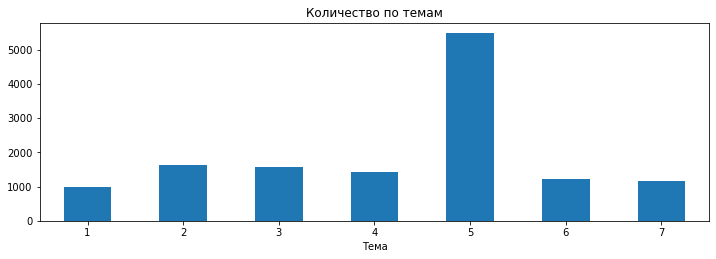

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1 = questions.groupby("part").count()['question_id'].plot.bar()
plt.title("Количество по темам")
plt.xlabel("Тема")
plt.xticks(rotation=0)

Больше всего вопросов по **5 группе**

**Посмотрим на топ-10 самых популярных вопросов в представленной выборке**

In [29]:
questions.sort_values('question_count', ascending=False).head(10)

,question_id,bundle_id,correct_answer,part,tags,wrong,right,question_count,percent_correct
6116,6116,6116,3,5,[23],1445.0,596.0,2041.0,0.292014
6173,6173,6173,2,5,[151],1405.0,573.0,1978.0,0.289687
4120,4120,4120,0,5,[123],1363.0,561.0,1924.0,0.291580
175,175,175,2,1,"[9, 10, 92]",1203.0,674.0,1877.0,0.359084
7876,7876,7876,3,1,"[10, 94, 92]",1076.0,771.0,1847.0,0.417434
7900,7900,7900,0,1,"[131, 93, 81]",330.0,1437.0,1767.0,0.813243
2063,2063,2063,0,3,"[136, 92, 29]",1409.0,286.0,1695.0,0.168732
2064,2064,2063,1,3,"[157, 92, 29]",625.0,1070.0,1695.0,0.631268
2065,2065,2063,2,3,"[136, 162, 92, 29]",626.0,1069.0,1695.0,0.630678
3364,3364,3363,1,4,"[136, 103, 29]",807.0,864.0,1671.0,0.517056


**Проанализируем какие из вопросов оказались самыми сложными**

In [30]:
# Рассмотрим вопросы, которые задавались более 10 раз
questions.loc[questions['question_count']>10].sort_values('percent_correct').head(10)

,question_id,bundle_id,correct_answer,part,tags,wrong,right,question_count,percent_correct
10062,10062,10062,0,6,[8],81.0,5.0,86.0,0.058140
11900,11900,11900,1,2,"[143, 114, 38, 81]",14.0,1.0,15.0,0.066667
3125,3125,3123,3,4,"[157, 12, 92]",86.0,9.0,95.0,0.094737
10826,10826,10823,2,6,[27],34.0,4.0,38.0,0.105263
8721,8721,8721,3,5,[174],70.0,9.0,79.0,0.113924
2529,2529,2527,2,3,"[136, 162, 81, 92]",37.0,5.0,42.0,0.119048
11143,11143,11143,2,6,[53],21.0,3.0,24.0,0.125000
8697,8697,8697,2,5,[73],41.0,6.0,47.0,0.127660
7639,7639,7638,1,7,"[118, 42, 21, 162]",68.0,10.0,78.0,0.128205
8986,8986,8986,0,5,[73],54.0,8.0,62.0,0.129032


**Анализ по тэгам**

In [31]:
tags = questions.tags.values
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'Всего {len(tags)} различных тэгов')

Всего 189 различных тэгов


In [32]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'wrong': ['sum'], 'right': ['sum']})
    df1['total_questions'] = df1.wrong + df1.right
    df1['question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['wrong', 'right', 'total_questions']] = tags_df[['wrong', 'right', 'total_questions']].astype(int)
tags_df['percent_correct'] = tags_df.right/tags_df.total_questions
tags_df = tags_df.sort_values(by = "percent_correct")

tags_df.head()

C:\Users\М\AppData\Local\Temp\ipykernel_3212\696502254.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\М\AppData\Local\Temp\ipykernel_3212\696502254.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\М\AppData\Local\Temp\ipykernel_3212\696502254.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\М\AppData\Local\Temp\ipykernel_3212\696502254.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tags_df = tags_df.append(df1)
C:\Users\М\AppData\Local\Temp\ipykernel_3212\696502254.py:9: FutureWarning: The frame.append met

,wrong,right,total_questions,question_ids_with_tag,percent_correct
tag,,,,,
24,1523,949,2472,17,0.383900
19,1746,1342,3088,57,0.434585
23,2510,2033,4543,11,0.447502
186,40,36,76,3,0.473684
151,2677,2495,5172,16,0.482405


Посмотрим топ-10 самых сложных и топ-10 самых легких вопросов по тэгам

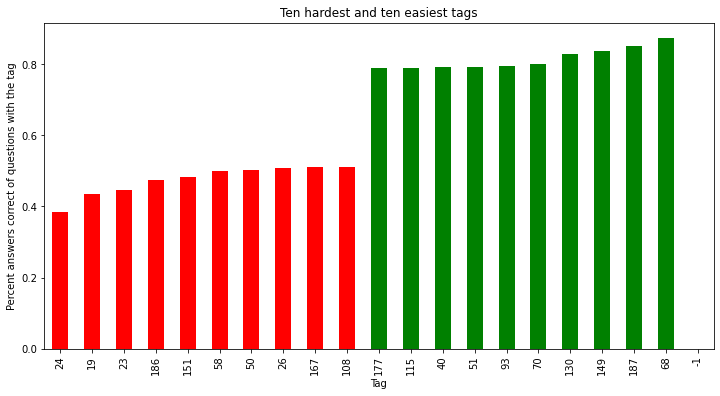

In [33]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Ten hardest and ten easiest tags")
plt.xlabel("Tag")
plt.ylabel("Percent answers correct of questions with the tag")
plt.xticks(rotation=90)
plt.show()

## 3.3. Таблица lectures

Проведем анализ таблицы **lectures**

In [34]:
lectures.shape[0]

418

Всего в базе сведения о **418 лекций**

**Распределение по типам лекций**

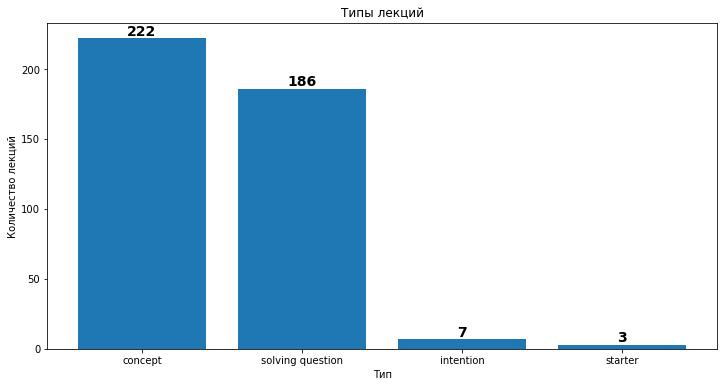

In [35]:
lect_type_of = lectures.type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Типы лекций")
plt.xlabel("Тип")
plt.ylabel("Количество лекций")
plt.xticks(rotation=0)
plt.show()

В лидерах **обычные** лекции и лекции с **решением задач**. Доля лекций типа **целепологания** и **вводных лекций** незначительна.


# 4. Выводы

+ Всего в представленной выборке присутствует информация об активности **3824 студентов**;


+ На платформе **13523 вопросов** и **418 лекций** по **7 темам**;


+ Лекции бывают **4 типов**: вводные, целеполагательные, концептуальное изложение материала и решение задач.


+ В среднем на ответ на вопрос у студентов уходит **25 секунд**;


+ **98%** активновти студентов приходится на ответы на вопросы, только **2%** тратится на просмотр лекций;


+ **65%** составляют правильные ответы, **35%** - неправильные.


+ Чем ближе к началу сессии вопрос, тем менее **успешно** его проходят студенты (т.е. успешность коррелирует со временем, проведенным на платформе)


+ Время ответа на вопрос **не влияет** на правильный ответ;


+ Если студент видел объяснение предыдущий задачи, он **в 2 раза чаще** отвечает правильно, чем неправильно